<b>Chapter 1, paragraph 1</b>

Measures of central tendency

<b> 1.1 - the Arithmetic mean </b>


When we talk about statistics, the most natural starting point for the journey is the arithmetic mean. As every simple concept, it is very powerfull and it is something that - trascending statistics - we have to deal with daily. Don't we always have in mind an "average something" against which all the rest is compared? But aside from this digression, from a statistical perspective the mean is the most natural and straight forward way to describe a complex phenomenon. Why is that so? Because what an average does, is to take a series of observation - no matter how many - and return one unique value that describes the whole series. Using some scientific notation, the arithmetic mean <b> (μ) </b> is defined as:

<b>  $$ {\mu =\frac{\sum^n_{i=1}x_i}{n}} $$ </b>

The arithmetic mean, therefore can be summarised in two actions:

<ol>
    <li>Sum up all the elements in a series - the numerator from the formula above. </li>
    <li>Divide the sum by the number of elements in the series - the denominator in the formula above. </li>
</ol>


Imagine you have to answer the question: in the European countries, what was the average carbon footprint per person in 2022? Let's see how to answer this question using data from the OECD, and check how the arithmetic mean can be a powerful synthetic index in this case.

In [15]:
#https://sdmx.herokuapp.com/OECD/dataflow
import pandas as pd
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
import getpass

if getpass.getuser() == 'simon':
    functionFolder = 'C:/Users/simon/Desktop/github_projects/hands_on_statistics/zz_help_functions/'
else:
    functionFolder = '/Users/tugbasabanoglu/Desktop/hands_on_statistics/'

sys.path.insert(1, functionFolder)
from database_connection_functions import get_from_oecd_v2


# Let's load the dataset and narrow it down to the values we are interested in

greenhouse_emissions_df = get_from_oecd_v2('OECD.ENV.EPI,DSD_AIR_GHG', 'DF_AIR_GHG,1.0', '.A.GHG._T.KG_CO2E_PS', '2018') # choose the indicator


greenhouse_emissions_df = greenhouse_emissions_df[(greenhouse_emissions_df['REF_AREA'].isin(['AUT', 'BEL', 'CZE', 'DEN', 'DNK', 'EST',
                                                                             'FIN', 'FRA', 'DEU', 'GRC', 'HUN', 'IRL',
                                                                             'ITA', 'LVA', 'LTU', 'LUX', 'NLD', 'POL',
                                                                             'PRT', 'SVK', 'SVN', 'ESP', 'SWE', ])) & 
                                                    (greenhouse_emissions_df['FREQ'] == 'A') & 
                                                    (greenhouse_emissions_df['POLLUTANT'] == 'GHG') & 
                                                    (greenhouse_emissions_df['MEASURE'] == '_T') &
                                                    (greenhouse_emissions_df['UNIT_MEASURE'] == 'KG_CO2E_PS') &
                                                    (greenhouse_emissions_df['TIME_PERIOD'] == 2022)].reset_index(drop = True) # filter the dimensions we are interested in

greenhouse_emissions_df = greenhouse_emissions_df[['REF_AREA', 'FREQ', 'POLLUTANT', 'UNIT_MEASURE', 'TIME_PERIOD', 'OBS_VALUE']] # keep only the relevant columns

greenhouse_emissions_df = greenhouse_emissions_df.rename(columns = {'REF_AREA': 'country_3l',
                                                                    'FREQ': 'frequency',
                                                                    'POLLUTANT': 'pollutant',
                                                                    'UNIT_MEASURE': 'unit',
                                                                    'TIME_PERIOD': 'year',
                                                                    'OBS_VALUE': 'value'}) # rename columns, so to assign relevant names

mean_kg_co2_pc = np.mean(greenhouse_emissions_df['value']).round(2) # calculate the mean, and round it to the 2. decimal place

print('In 2022 the average CO2 equivalent production per person was ' + str(mean_kg_co2_pc) + ' tons (1000 kilograms) yearly.')

In 2022 the average CO2 equivalent production per person was 7.94 tons (1000 kilograms) yearly.


We found out that the carbon footprint of an average European citizen is almost 8 tons of CO2 equivalent per year. Quite a shocking number, isn't it?

How can we drill further down this number? Usually, the best way to make use of the arithmetic mean is to show it in contrast to the single datapoints that generated it. And here is where data visualization becomes a powerfull ally. Let's continue the example from above to see how.

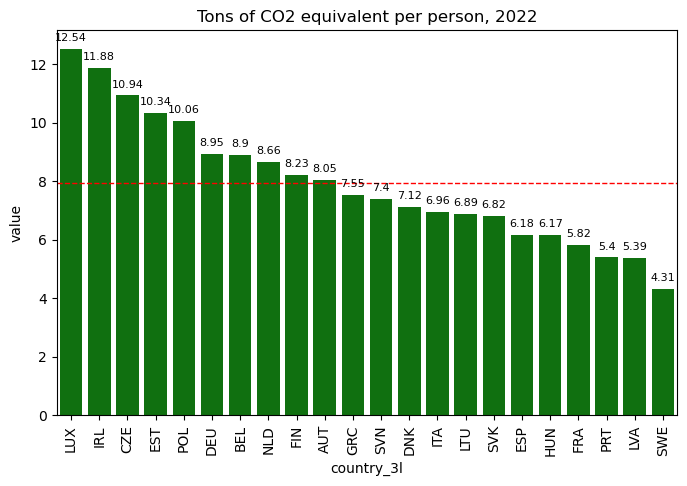

In [36]:
greenhouse_emissions_df = greenhouse_emissions_df.sort_values(['value'], ascending = False).reset_index(drop = True) # sort the data, so to have a more harmonic visualization
greenhouse_emissions_df['value'] = greenhouse_emissions_df['value'].round(2) # round the values, so to have a better fit in the graph's bars headers

plt.figure(figsize=(8, 5)) # declare the figures' size

sns.barplot(x = 'country_3l', 
            y = 'value', 
            data = greenhouse_emissions_df, 
            color = 'green') # define the graph's type & datapoints

plt.xticks(rotation=90) # rotate the countries' labels in the x-axis to improve readability 

plt.axhline(y = mean_kg_co2_pc, 
            color = 'red', 
            linestyle = '--', 
            linewidth = 1) # add the horizontal line with the average

for index, row in greenhouse_emissions_df.iterrows():
    plt.text(index, 
             row['value'] + 0.2, 
             row['value'], 
             ha = 'center', 
             va = 'bottom', 
             fontsize = 8) # generate the data labels

plt.title('Tons of CO2 equivalent per person, 2022') # add the title

plt.show()

# This part was generated with the help of ChatGPT asking the question "How can I plot a barchart from a python dataframe using seaborn?." Hereby seaborn was preferred to
# matplotlib as it is more user-friendly in its functions and will be used extensively in later chapters too.  

When we only looked at the average, we had an idea of how much CO2 each person in Europe produces, but we became blind in terms of how this production is distributed. Is it evenly distributed across all European countries? Or are there large disparities?

The bar chart above, by plotting the CO2 equivalent production per country and showing the average as an horizontal line, shows how there are noticeable differences among the countries. Notably, Sweden and Lithuania with 4.31 and 5.39 tons of CO2 equivalent emitted per capita in 2022 are way below the 15.54 and 11.88 tons emitted by the average person in Luxembourg and Ireland respectively. Quite a difference, isn't it?  